<a href="https://www.kaggle.com/code/samithsachidanandan/demand-forecasting-for-stores?scriptVersionId=268244937" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('/kaggle/input/demand-forecasting/train_0irEZ2H.csv')

In [3]:
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [5]:
df.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [6]:
df[df['total_price'].isnull()]

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
136949,193915,23/04/13,9436,245338,NaN,469.5375,0,0,1


In [7]:
df['total_price'] = df['total_price'].fillna(df['total_price'].mean())

In [8]:
df[df['total_price'].isnull()]

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold


In [9]:
df[['day','month','year']] = df['week'].str.split('/', expand=True)

In [10]:
df = df.drop('week', axis=1)

In [11]:
df

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [12]:
X, y = df.drop('units_sold', axis = 1), df['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [13]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [14]:
model.score(X_test, y_test)

0.7792047893431038

In [15]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_pred,y_test))

rmse

26.91573781299673

In [16]:
df.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

<Axes: >

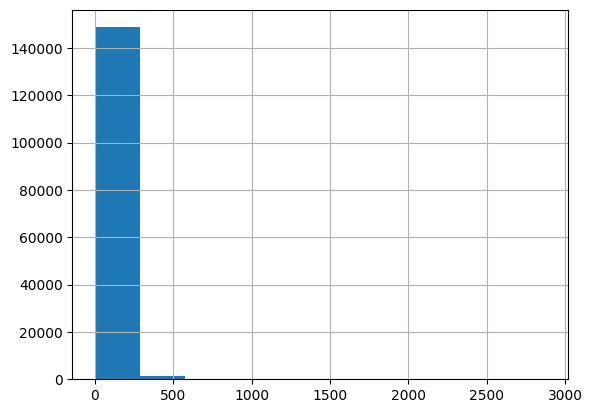

In [17]:
df.units_sold.hist()

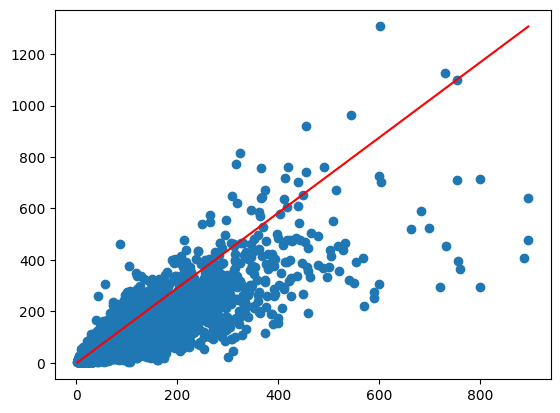

In [18]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(),y_test.max()),color='red')

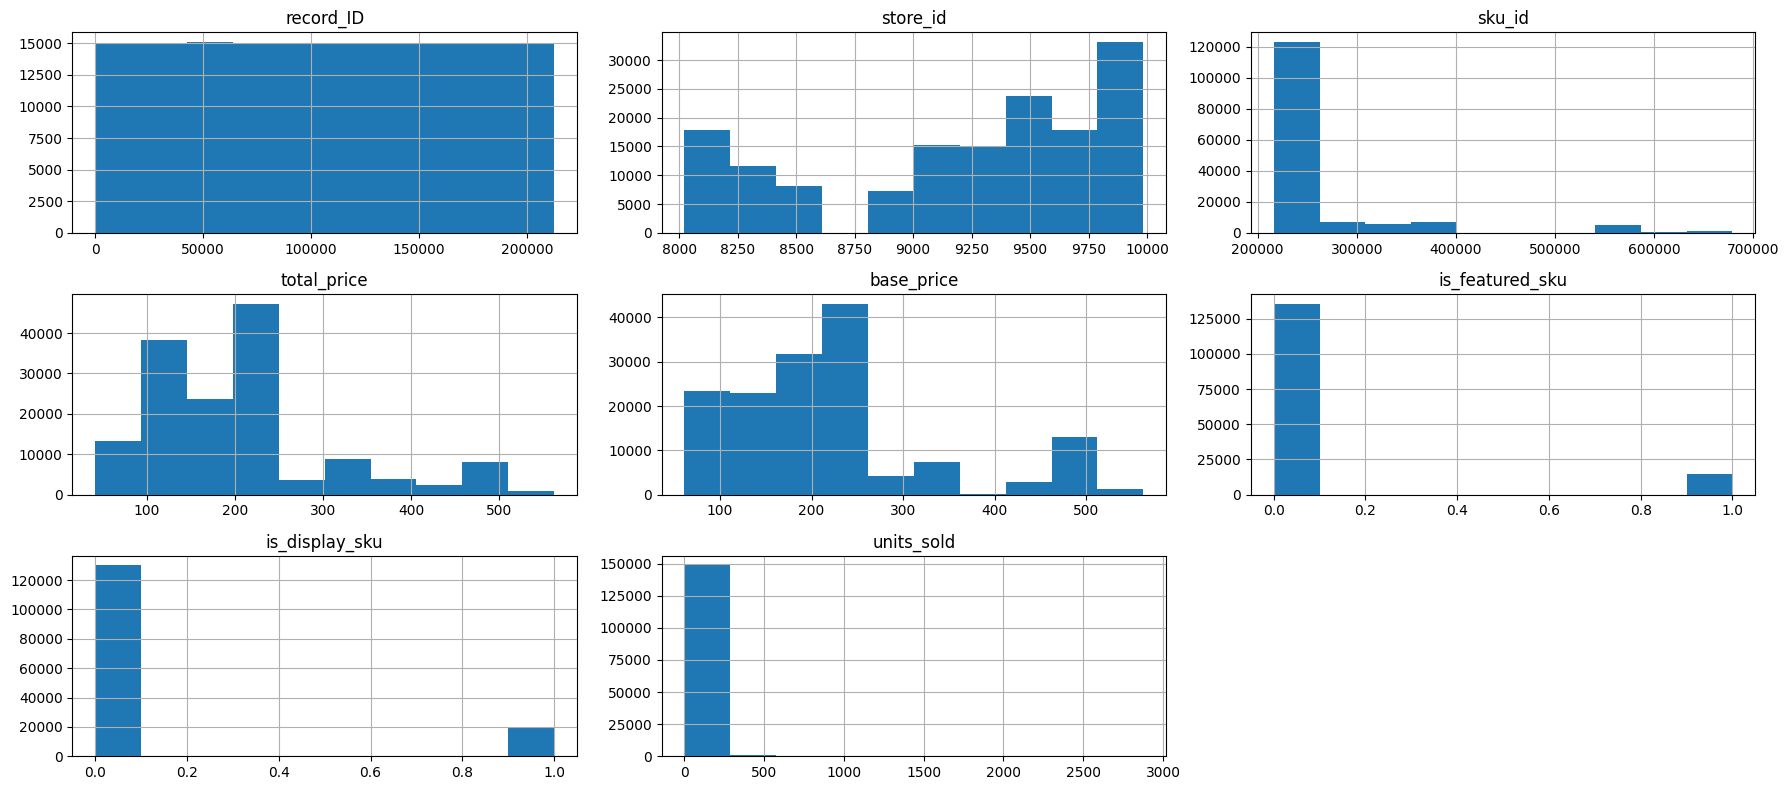

In [19]:
df.hist(figsize=(18,8))
plt.tight_layout()
plt.show()

In [20]:
df = df.drop('record_ID', axis =1)

In [21]:
len(df.store_id.unique())

76

In [22]:
len(df.sku_id.unique())

28

In [23]:
df.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

In [24]:
df.units_sold.quantile(0.99)

283.0

In [25]:
df = df[df.units_sold < df.units_sold.quantile(0.99)]

In [26]:
df

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,13


<Axes: >

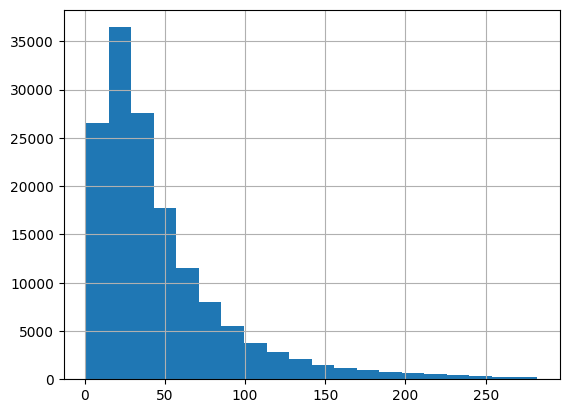

In [27]:
df.units_sold.hist(bins=20)

### One hot encoding

In [28]:
df = df.join(pd.get_dummies(df.store_id, prefix='store')).drop('store_id', axis=1)
df = df.join(pd.get_dummies(df.sku_id, prefix='item')).drop('sku_id', axis=1)

In [29]:
model = RandomForestRegressor(n_jobs=-1)

X,y = df.drop('units_sold', axis=1), df['units_sold']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [30]:
X_train.shape, X_test.shape

((118908, 111), (29728, 111))

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
model.fit(X_train_scaled, y_train)


RandomForestRegressor(n_jobs=-1)

In [33]:
model.score(X_test_scaled, y_test)

0.8251675440458264

In [34]:
y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_pred,y_test))

rmse

17.848413985137427

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [20,30, 50],
    'min_samples_split':[5,10]
}

model = RandomForestRegressor(n_jobs=-1)

grid_search = GridSearchCV(model, param_grid, verbose=2, cv=3)

grid_search.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ...............min_samples_split=5, n_estimators=20; total time=   9.9s
[CV] END ...............min_samples_split=5, n_estimators=20; total time=   9.8s
[CV] END ...............min_samples_split=5, n_estimators=20; total time=   9.8s
[CV] END ...............min_samples_split=5, n_estimators=30; total time=  14.9s
[CV] END ...............min_samples_split=5, n_estimators=30; total time=  14.6s
[CV] END ...............min_samples_split=5, n_estimators=30; total time=  14.5s
[CV] END ...............min_samples_split=5, n_estimators=50; total time=  24.0s
[CV] END ...............min_samples_split=5, n_estimators=50; total time=  23.9s
[CV] END ...............min_samples_split=5, n_estimators=50; total time=  23.6s
[CV] END ..............min_samples_split=10, n_estimators=20; total time=   9.3s
[CV] END ..............min_samples_split=10, n_estimators=20; total time=   9.3s
[CV] END ..............min_samples_split=10, n_es

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'min_samples_split': [5, 10],
                         'n_estimators': [20, 30, 50]},
             verbose=2)

In [36]:
best_model = grid_search.best_estimator_

In [37]:
grid_search.best_params_

{'min_samples_split': 10, 'n_estimators': 50}

In [38]:
best_model.score(X_test_scaled, y_test)

0.82700093241078

In [39]:
y_pred = best_model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_pred,y_test))

rmse

17.75458325122169

In [40]:
from tensorflow.keras import models, layers

input_dim = X_train_scaled.shape[1]
num_classes = len(np.unique(y_train))

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    

    layers.Dense(32, activation='relu'),
    

    layers.Dense(1)
])

2025-10-15 12:51:03.359090: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760532663.699606      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760532663.804113      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-15 12:51:21.888222: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [41]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

model.summary()

Epoch 1/20
2973/2973 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1087.9213 - mae: 21.0215 - val_loss: 459.6687 - val_mae: 14.1957
Epoch 2/20
2973/2973 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 457.8854 - mae: 13.9758 - val_loss: 398.5298 - val_mae: 13.1237
Epoch 3/20
2973/2973 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 410.2392 - mae: 13.1862 - val_loss: 379.5102 - val_mae: 12.8931
Epoch 4/20
2973/2973 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 394.1316 - mae: 12.9119 - val_loss: 371.6641 - val_mae: 12.7220
Epoch 5/20
2973/2973 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 384.6885 - mae: 12.7570 - val_loss: 368.2211 - val_mae: 12.6959
Epoch 6/20
2973/2973 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 377.0453 - mae: 12.5972 - val_loss: 361.3699 - val_mae: 12.3084
Epoch 7/20
2973/2973 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 362.9616 - mae: 12.4151 - val_loss: 359.1087 - val_mae: 12.4538
Epoch 8/20
2973/2973 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 362.8994 - mae: 12.3647 - val_loss: 356.4004 - val_mae

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,845 (108.77 KB)

 Trainable params: 9,281 (36.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,564 (72.52 KB)

In [42]:
y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


18.27819671476244

In [43]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8166463790224571